In [2]:
# lets import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the cleaned csv file
path="cleaned-auto-car-dataset.csv"
data = pd.read_csv(path)
data.head()
data.drop(columns="Unnamed: 0", axis=0, inplace=True)
data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower_binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


In [5]:
# now we will load the machine learning model(linear regression model) from Sklearn library
from sklearn.linear_model import LinearRegression

In [6]:
#lets create an object of the model
lrm=LinearRegression()
lrm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
#Lets define the training variables X and Y
X = data[['engine-size']]
Y = data['price']

In [8]:
#lets train the model using fit method
lrm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
#now lets check the out the prediction
Yhat=lrm.predict(X)
Yhat[0:5] 

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [9]:
print("The value of slope is =",lrm.coef_)
print("The value of intercept is =",lrm.intercept_)

The value of slope is = [166.86001569]
The value of intercept is = -7963.338906281049


In [10]:
# lest create another linear regression object and use different feature
lrm1=LinearRegression()
lrm1.fit(data[["highway-L/100km"]],data[["price"]])
lrm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# now lets predict
yhat=lrm1.predict(X)
yhat[0:5]

array([[435011.22165403],
       [435011.22165403],
       [511102.29414319],
       [362378.83427801],
       [455763.33233289]])

In [12]:
#Let's develop a model using these variables as the predictor variables.
mdata = data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [19]:
#Fit the Multiple linear regression model using the four above-mentioned variables.
mlr=LinearRegression()
mlr.fit(mdata, data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print("The value of slope is =",mlr.coef_)
print("The value of intercept is =",mlr.intercept_)

The value of slope is = [ 36.6377371    3.50038215  85.37370862 500.51979785]
The value of intercept is = -14385.634549360107


C:\Users\Babar kahn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 47824.08609304422)

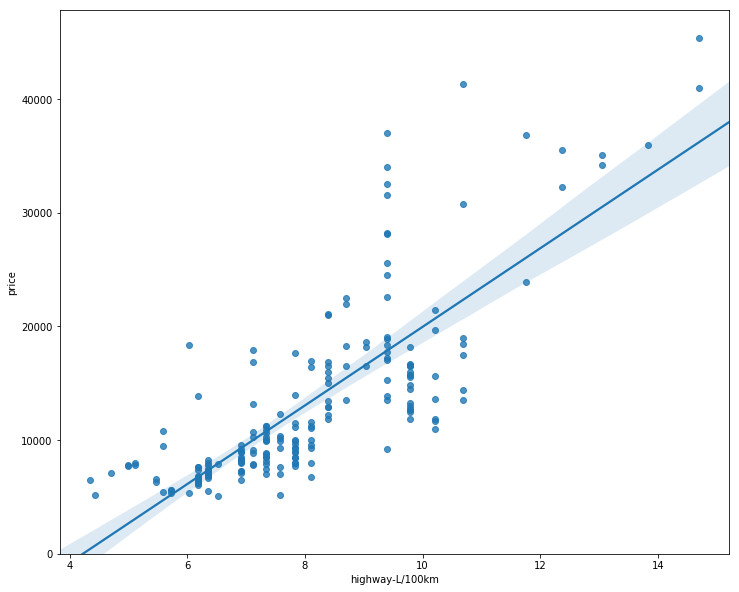

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=data)
plt.ylim(0,)

C:\Users\Babar kahn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 47422.919330307624)

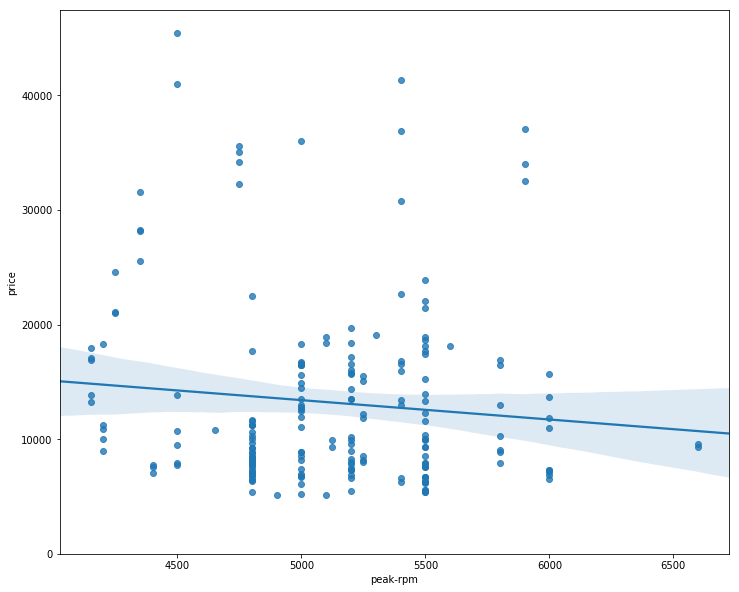

In [14]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=data)
plt.ylim(0,)

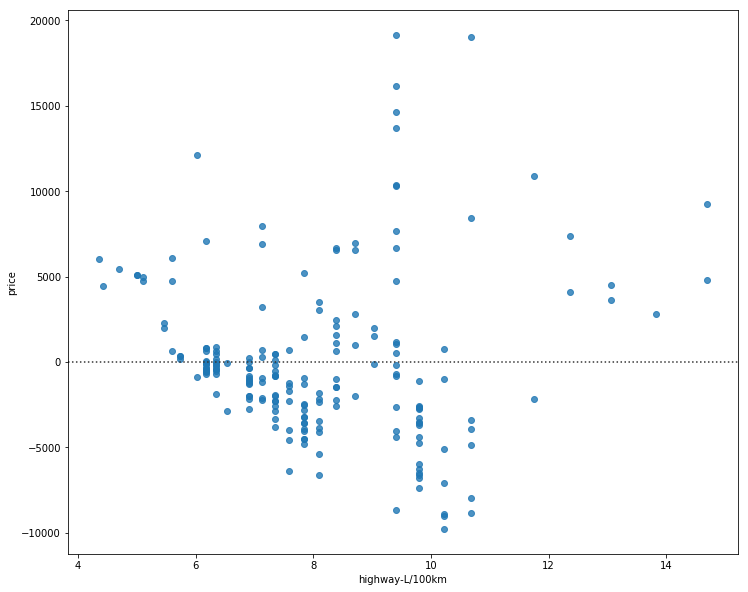

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['highway-L/100km'], data['price'])
plt.show()

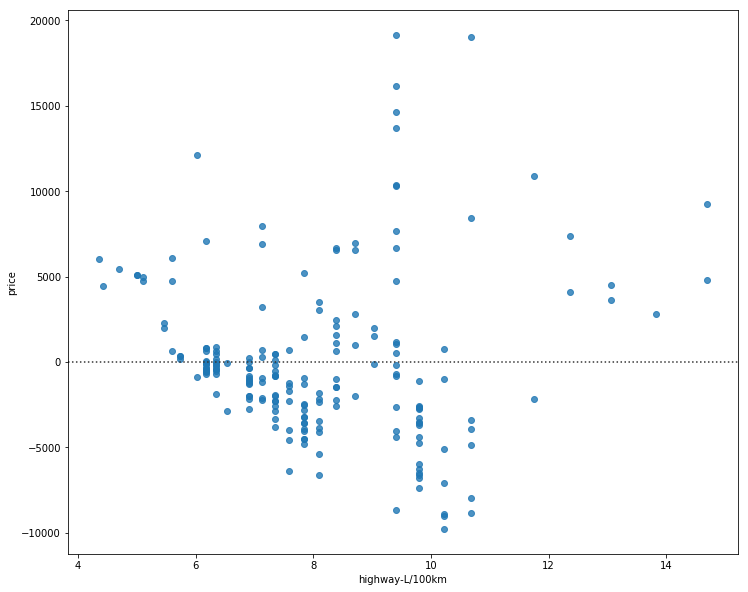

In [33]:
# lets chek the residual plot for highway-L/100km and price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data["highway-L/100km"], data["price"])
plt.show()

In [16]:
data[["peak-rpm","highway-L/100km","price"]].corr()

,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,0.017694,-0.101616
highway-L/100km,0.017694,1.000000,0.801118
price,-0.101616,0.801118,1.000000


In [27]:
#lets say yhat is the new predicted data we use the predict() method.
Yhat = mlr.predict(mdata)

C:\Users\Babar kahn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


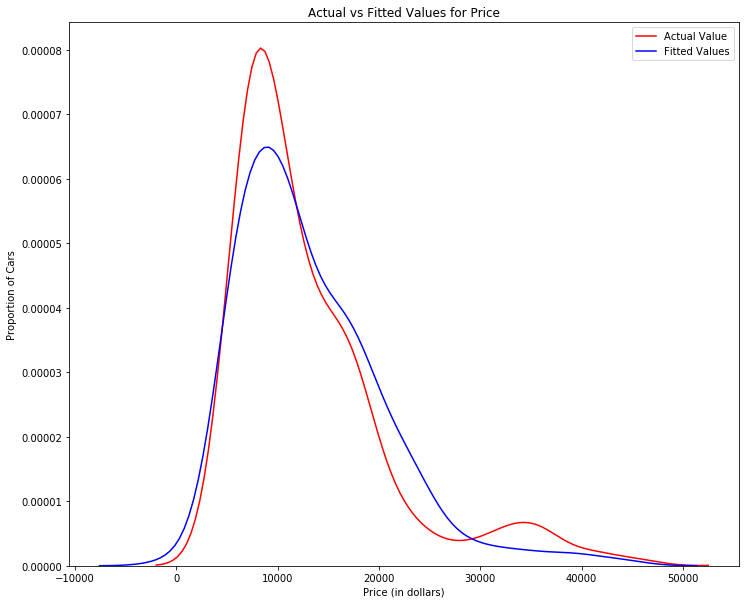

In [25]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(data['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [37]:
# Function to plot data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [34]:
#Lets take two variables
x = data["highway-L/100km"]
y = data["price"]

In [42]:
data["highway-L/100km"].head()

0     8.703704
1     8.703704
2     9.038462
3     7.833333
4    10.681818
Name: highway-L/100km, dtype: float64

In [40]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


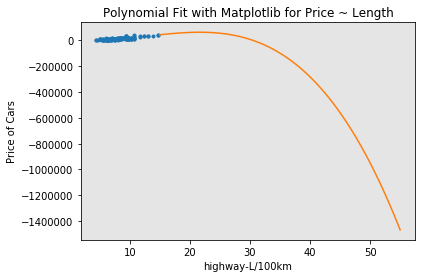

In [41]:
#lets plot the function
PlotPolly(p, x, y, 'highway-L/100km')

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
We create a PolynomialFeatures object of degree 2: 
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [46]:
Z_pr=pr.fit_transform(mdata)

In [47]:
#The original data is of 201 samples and 4 features 
mdata.shape

(201, 4)

In [48]:
#the data set after transformation
Z_pr.shape

(201, 15)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [50]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [51]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [53]:
pipe.fit(mdata,y)

C:\Users\Babar kahn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Babar kahn\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [55]:
ypipe=pipe.predict(mdata)
ypipe[0:4]

C:\Users\Babar kahn\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([12395.58706934, 12395.58706934, 18422.45365339,  9979.7757077 ])

In [ ]:
#Model 1: Simple Linear Regression
#Let's calculate the R^2

In [57]:
#highway_mpg_fit
X=data[["highway-L/100km"]]
Y=data[["price"]]
lrm1.fit(X, Y)
# Find the R^2
print('The R-square is: ', lrm1.score(X, Y))

The R-square is:  0.6417894513258818


In [58]:
#Let's calculate the MSE
#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lrm1.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[15485.52737455]
 [15485.52737455]
 [16643.34931414]
 [12475.19033163]]


In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
#compare the predicted results with the actual results 
mse = mean_squared_error(data['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  22510543.777085222


In [61]:
# Check for Multiple Linear Regression model mlr
# fit the model 
mlr.fit(mdata, data['price'])
# Find the R^2
print('The R-square is: ', mlr.score(mdata, data['price']))

The R-square is:  0.811811561534475


In [64]:
Y_predict_multifit = mlr.predict(mdata)
print('The mean square error of price and predicted value using multiple linear regression fit model is: ', \
      mean_squared_error(data['price'], Y_predict_multifit))

The mean square error of price and predicted value using multiple linear regression fit model is:  11826072.956532082


In [65]:
from sklearn.metrics import r2_score

In [66]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6753581660812171


In [67]:
mean_squared_error(data['price'], p(x))

20401030.180019405